In [34]:
## 필요한 라이브러리 임포트
import requests
import pprint
import json
import pandas as pd

url = "http://apis.data.go.kr/1130000/FftcBrandFrcsStatsService/getBrandFrcsStats"
params = {
    "serviceKey": "cIaG8zzGMw0joPyNGFxL2yxs6nyS8z3KmlC7+8IZ11qWT1AMBfva6DAlrd7nNxdvebfeK1wun4acoQX1H4Fu1g==",
    "pageNo": "1",
    "numOfRows": "10000",
    "resultType": "json",
    "yr": "2022"
}

response = requests.get(url, params=params)

contents = response.text


pp = pprint.PrettyPrinter(indent=4)


data = response.json()

items = data["items"]
df = pd.DataFrame(items)

df = df.iloc[:, :5]
df

,yr,indutyLclasNm,indutyMlsfcNm,corpNm,brandNm
0,2022,외식,한식,제주인,제주고세호해장국
1,2022,외식,한식,해닭,해닭
2,2022,외식,한식,(주)제이제이에프앤비(JJF&B),제주옥탑
3,2022,외식,한식,(주)스타셀러,별을 품은 곱창
4,2022,외식,한식,(주)마음을담다,마음한줄김밥집
...,...,...,...,...,...
7731,2022,서비스,안경,마켓옵틱(주),안경상회
7732,2022,서비스,안경,안테나안경,안테나안경
7733,2022,서비스,이사,(주)통인익스프레스,통인익스프레스
7734,2022,서비스,이사,예스2424(주),예스2424


In [35]:
# 데이터프레임에서 1번째 열 삭제
df = df.iloc[:, 1:6]
df

,indutyLclasNm,indutyMlsfcNm,corpNm,brandNm
0,외식,한식,제주인,제주고세호해장국
1,외식,한식,해닭,해닭
2,외식,한식,(주)제이제이에프앤비(JJF&B),제주옥탑
3,외식,한식,(주)스타셀러,별을 품은 곱창
4,외식,한식,(주)마음을담다,마음한줄김밥집
...,...,...,...,...
7731,서비스,안경,마켓옵틱(주),안경상회
7732,서비스,안경,안테나안경,안테나안경
7733,서비스,이사,(주)통인익스프레스,통인익스프레스
7734,서비스,이사,예스2424(주),예스2424


In [36]:
# 열의 순서 변경하여 제일 왼쪽으로 옮기기
df = df.iloc[:, [2, 3] + list(range(2)) + list(range(4, df.shape[1]))]
ㅇ

In [37]:
df

,corpNm,brandNm,indutyLclasNm,indutyMlsfcNm
0,제주인,제주고세호해장국,외식,한식
1,해닭,해닭,외식,한식
2,(주)제이제이에프앤비(JJF&B),제주옥탑,외식,한식
3,(주)스타셀러,별을 품은 곱창,외식,한식
4,(주)마음을담다,마음한줄김밥집,외식,한식
...,...,...,...,...
7731,마켓옵틱(주),안경상회,서비스,안경
7732,안테나안경,안테나안경,서비스,안경
7733,(주)통인익스프레스,통인익스프레스,서비스,이사
7734,예스2424(주),예스2424,서비스,이사


In [38]:
new_column_names = {'corpNm': '기업명', 'brandNm' : '브랜드명', 'indutyLclasNm' : '대분류', 'indutyMlsfcNm' : '업종'}
df.rename(columns=new_column_names, inplace=True)
df

,기업명,브랜드명,대분류,업종
0,제주인,제주고세호해장국,외식,한식
1,해닭,해닭,외식,한식
2,(주)제이제이에프앤비(JJF&B),제주옥탑,외식,한식
3,(주)스타셀러,별을 품은 곱창,외식,한식
4,(주)마음을담다,마음한줄김밥집,외식,한식
...,...,...,...,...
7731,마켓옵틱(주),안경상회,서비스,안경
7732,안테나안경,안테나안경,서비스,안경
7733,(주)통인익스프레스,통인익스프레스,서비스,이사
7734,예스2424(주),예스2424,서비스,이사


In [49]:
df_a.to_excel("1.xlsx", index=False)

In [47]:
df_a = df_new.iloc[:, [3, 4, 6, 7]]
df_a

,corpNm,brandNm,indutyLclasNm,indutyMlsfcNm
0,(주)오피스넥스,오피스넥스(officenex),도소매,기타도소매
1,(주)대승인터컴,락휴노래연습장,서비스,오락
2,(주)에뛰드,에뛰드,도소매,화장품
3,(주)푸드넷시스템,토스피아(TOSPIA),외식,패스트푸드
4,지에스엠비즈(주),autoOasis,서비스,자동차 관련
...,...,...,...,...
5162,꿔바로우주는마라탕본점,꿔마 꿔바로우주는마라탕,외식,중식
5163,㈜정이조영어학원,정이조주니어영어학원,서비스,교육 (외국어)
5164,(주)지일,닥터포커스 스터디카페,서비스,기타 서비스
5165,해리초밥용암본점,해리초밥,외식,일식


In [48]:
new_column_names = {'corpNm': '기업명', 'brandNm' : '브랜드명', 'indutyLclasNm' : '대분류', 'indutyMlsfcNm' : '업종'}
df_a.rename(columns=new_column_names, inplace=True)
df_a

C:\Users\Administrator\AppData\Local\Temp\ipykernel_18204\2916390653.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a.rename(columns=new_column_names, inplace=True)


,기업명,브랜드명,대분류,업종
0,(주)오피스넥스,오피스넥스(officenex),도소매,기타도소매
1,(주)대승인터컴,락휴노래연습장,서비스,오락
2,(주)에뛰드,에뛰드,도소매,화장품
3,(주)푸드넷시스템,토스피아(TOSPIA),외식,패스트푸드
4,지에스엠비즈(주),autoOasis,서비스,자동차 관련
...,...,...,...,...
5162,꿔바로우주는마라탕본점,꿔마 꿔바로우주는마라탕,외식,중식
5163,㈜정이조영어학원,정이조주니어영어학원,서비스,교육 (외국어)
5164,(주)지일,닥터포커스 스터디카페,서비스,기타 서비스
5165,해리초밥용암본점,해리초밥,외식,일식


In [46]:
df_new

,jngIfrmpRgsno,brno,crno,corpNm,brandNm,jnghdqrtrsRprsvNm,indutyLclasNm,indutyMlsfcNm
0,20080100007,1148662046,1101113755498,(주)오피스넥스,오피스넥스(officenex),"선장덕,조성우",도소매,기타도소매
1,20080100023,2028162334,1101111595127,(주)대승인터컴,락휴노래연습장,안선태,서비스,오락
2,20080100025,1358105033,1345110002979,(주)에뛰드,에뛰드,이수연,도소매,화장품
3,20080100030,1068644917,1101113493957,(주)푸드넷시스템,토스피아(TOSPIA),최경업,외식,패스트푸드
4,20080100044,2148165071,1101111007023,지에스엠비즈(주),autoOasis,허철홍,서비스,자동차 관련
...,...,...,...,...,...,...,...,...
5162,20230801,7151200240,None,꿔바로우주는마라탕본점,꿔마 꿔바로우주는마라탕,JIN BIAO,외식,중식
5163,20230802,1178165917,1101113926007,㈜정이조영어학원,정이조주니어영어학원,정이조,서비스,교육 (외국어)
5164,20230803,6168801501,1701110765670,(주)지일,닥터포커스 스터디카페,전지수,서비스,기타 서비스
5165,20230804,1175600566,None,해리초밥용암본점,해리초밥,정현철,외식,일식


In [27]:
import openpyxl

df.to_excel("2.xlsx", index=False)

indutyMlsfcNm
한식              1997
기타 외식            897
커피               622
치킨               446
분식               405
기타 서비스           376
기타도소매            301
일식               284
주점               250
이미용              204
제과제빵             188
중식               184
기타 교육            175
서양식              174
피자               161
기타 외국식           120
스포츠 관련           108
패스트푸드             98
교육 (외국어)          97
음료 (커피 외)         70
교육 (교과)           59
자동차 관련            54
안경                47
의류 / 패션           44
반려동물 관련           43
아이스크림/빙수          41
편의점               37
농수산물              31
유아 관련 (교육 외)      28
(건강)식품            23
PC방               21
세탁                21
오락                18
화장품               17
임대                15
숙박                15
종합소매점             14
운송                13
인력 파견             13
부동산 중개             7
유아관련               6
이사                 4
배달                 4
약국                 4
Name: count, dtype: int64


C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49885 (\N{HANGUL SYLLABLE SIG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50808 (\N{HANGUL S

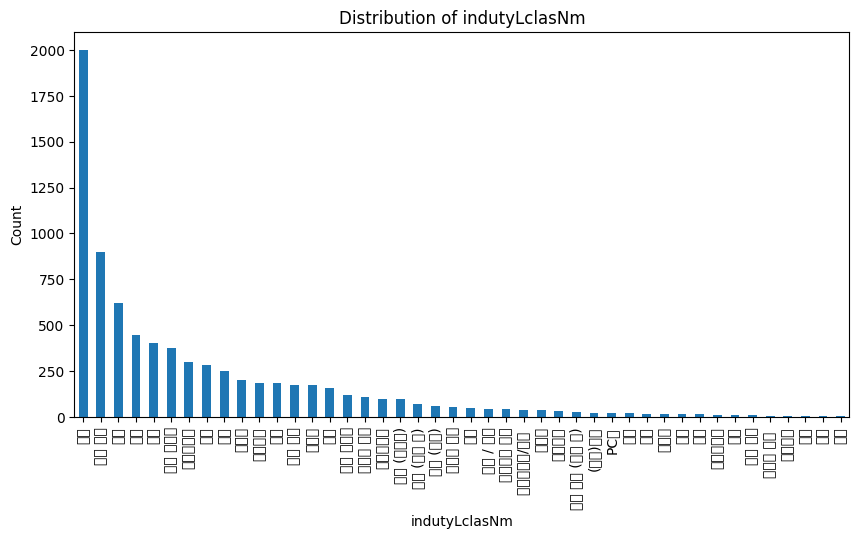

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 가정: df가 당신의 데이터프레임의 이름입니다.
indutyLclasNm_count = df['indutyMlsfcNm'].value_counts()

print(indutyLclasNm_count)

# 시각화
plt.figure(figsize=(10,5))
indutyLclasNm_count.plot(kind='bar')
plt.title('Distribution of indutyLclasNm')
plt.xlabel('indutyLclasNm')
plt.ylabel('Count')
plt.show()


In [14]:
import pandas as pd

# 엑셀 파일 경로 설정
file_path = './거래내역/park_card_전처리.xlsx'

# 엑셀 파일 불러오기
df = pd.read_excel(file_path)

# 데이터프레임 출력
df

,이용일시,이용하신곳,이용금액,업명
0,2023-05-31\n19:12,대영면옥,"18,000",식비
1,2023-05-31\n13:05,은화수식당경성대점,"40,500",식비
2,2023-05-27\n11:13,시외버스 승차권,"13,200",시외버스
3,2023-05-27\n09:04,스타벅스코리아,"1,200",카페
4,2023-05-26\n14:21,블루샥 남천점,"7,200",카페
...,...,...,...,...
319,2022-06-10\n05:42,버스_모바일 12 건,"14,400",대중교통
320,2022-06-06\n12:16,시외버스 승차권,"12,400",시외버스
321,2022-06-06\n05:59,지하철_모바일 4 건,"1,800",대중교통
322,2022-06-05\n12:18,투썸 통영루지점,"4,900",카페


In [21]:
# 6번째와 7번째 열 선택
new_df = df.iloc[:, [1, 3]]

new_column_names = {'이용하신곳': '내용'}
new_df.rename(columns=new_column_names, inplace=True)


# 새로운 데이터프레임 출력
new_df

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10960\3268416143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.rename(columns=new_column_names, inplace=True)


,내용,업명
0,대영면옥,식비
1,은화수식당경성대점,식비
2,시외버스 승차권,시외버스
3,스타벅스코리아,카페
4,블루샥 남천점,카페
...,...,...
319,버스_모바일 12 건,대중교통
320,시외버스 승차권,시외버스
321,지하철_모바일 4 건,대중교통
322,투썸 통영루지점,카페


In [23]:
new_df_2

,내용,업명
0,행정인턴4월,월급
1,씨유(CU)부경대기,편의점
2,카카오페이,금융지원서비스업
3,정우종합사무기,프린트
4,정우종합사무기,프린트
...,...,...
1139,카카오페이,금융지원서비스업
1140,씨제이올리브영(,쇼핑
1141,하삼동커피부경대,카페
1142,씨유(CU)부경대기,편의점


In [22]:
new_df_1

,내용,업명
0,크로키닷컴,쇼핑
1,동백전충전,동백전충전
2,카카오페이,금융지원서비스업
3,동백전충전,동백전충전
4,주식회사 서북,사진
...,...,...
754,지에스(GS)25 화명하,편의점
755,동백전충전,동백전충전
756,지그재그((,쇼핑
757,세이프박스,예금


In [27]:
combined_df = pd.concat([new_df, new_df_1], axis=0)
combined_df_1 = pd.concat([combined_df, new_df_2], axis=0)
combined_df_1

,내용,업명
0,대영면옥,식비
1,은화수식당경성대점,식비
2,시외버스 승차권,시외버스
3,스타벅스코리아,카페
4,블루샥 남천점,카페
...,...,...
1139,카카오페이,금융지원서비스업
1140,씨제이올리브영(,쇼핑
1141,하삼동커피부경대,카페
1142,씨유(CU)부경대기,편의점


In [54]:
df

In [50]:
import pandas as pd

# df.to_excel("data.xlsx", index=False)
# 엑셀 파일 불러오기
df = pd.read_excel('./data.xlsx')

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   내용      2224 non-null   object
 1   업명      2224 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


Epoch 1/100
45/45 [==============================] - 2s 12ms/step - loss: 3.3909 - accuracy: 0.1448 - val_loss: 2.7783 - val_accuracy: 0.3034
Epoch 2/100
45/45 [==============================] - 0s 5ms/step - loss: 2.6060 - accuracy: 0.2108 - val_loss: 2.2715 - val_accuracy: 0.3792
Epoch 3/100
45/45 [==============================] - 0s 5ms/step - loss: 1.9442 - accuracy: 0.4392 - val_loss: 1.7558 - val_accuracy: 0.5618
Epoch 4/100
45/45 [==============================] - 0s 5ms/step - loss: 1.3580 - accuracy: 0.6388 - val_loss: 1.4895 - val_accuracy: 0.6320
Epoch 5/100
45/45 [==============================] - 0s 5ms/step - loss: 1.0323 - accuracy: 0.7203 - val_loss: 1.3048 - val_accuracy: 0.6910
Epoch 6/100
45/45 [==============================] - 0s 5ms/step - loss: 0.8327 - accuracy: 0.7857 - val_loss: 1.1972 - val_accuracy: 0.7163
Epoch 7/100
45/45 [==============================] - 0s 5ms/step - loss: 0.6603 - accuracy: 0.8320 - val_loss: 1.1244 - val_accuracy: 0.7669
Epoch 8/100


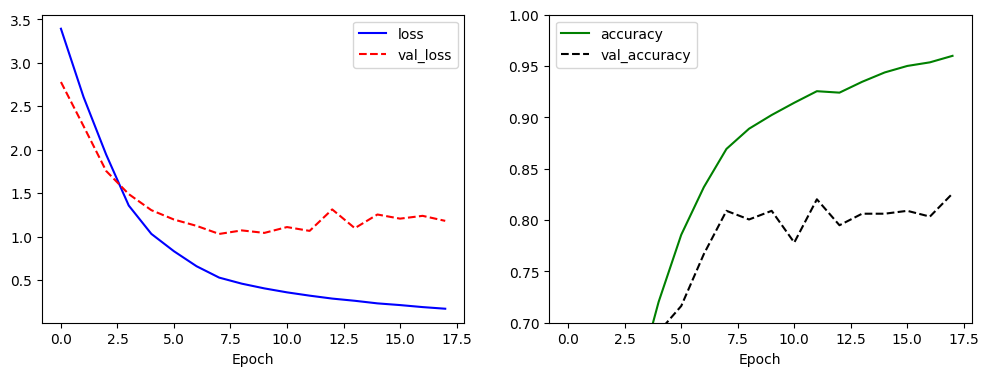

14/14 [==============================] - 0s 2ms/step - loss: 1.7082 - accuracy: 0.7416

 테스트 정확도: 0.7416


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 데이터 전처리
X_data = df['내용'].values
y_data = df['업명'].values

# 라벨 인코딩
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)

# 텍스트 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

# 패딩
X_data = pad_sequences(sequences, padding='post')

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 128, input_length=X_train.shape[1]))
model.add(LSTM(128))
model.add(Dense(np.max(y_data)+1, activation='softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 조기 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# 모델 평가
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


In [8]:
import kerastuner as kt
from tensorflow.keras.optimizers import Adam


def model_builder(hp):
    model = Sequential()

    # Tuning the embedding output dimension
    output_dim = hp.Int('output_dim', min_value=32, max_value=512, step=32)
    model.add(Embedding(len(tokenizer.word_index)+1, output_dim, input_length=X_train.shape[1]))

    # Tuning the number of units in the LSTM layer
    units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(LSTM(units))

    model.add(Dense(np.max(y_data)+1, activation='softmax'))

    # Tuning the learning rate in the optimizer
    lr = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

    return model   

tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=100, factor=3, directory='my_dir', project_name='intro_to_kt')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal output dimension in the Embedding layer is {best_hps.get('output_dim')}, 
the optimal number of units in the LSTM layer is {best_hps.get('units')}, and the optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")


Trial 254 Complete [00h 00m 32s]
val_accuracy: 0.7303370833396912

Best val_accuracy So Far: 0.882022500038147
Total elapsed time: 00h 08m 05s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal output dimension in the Embedding layer is 480, 
the optimal number of units in the LSTM layer is 224, and the optimal learning rate for the optimizer is 0.01.



Epoch 1/100
45/45 [==============================] - 2s 22ms/step - loss: 2.2027 - accuracy: 0.4399 - val_loss: 1.3097 - val_accuracy: 0.7051
Epoch 2/100
45/45 [==============================] - 1s 16ms/step - loss: 1.0727 - accuracy: 0.7337 - val_loss: 1.8446 - val_accuracy: 0.5983
Epoch 3/100
45/45 [==============================] - 1s 16ms/step - loss: 0.6340 - accuracy: 0.8433 - val_loss: 0.8803 - val_accuracy: 0.8258
Epoch 4/100
45/45 [==============================] - 1s 16ms/step - loss: 0.3785 - accuracy: 0.9051 - val_loss: 0.9231 - val_accuracy: 0.8427
Epoch 5/100
45/45 [==============================] - 1s 16ms/step - loss: 0.2657 - accuracy: 0.9304 - val_loss: 0.9335 - val_accuracy: 0.8567
Epoch 6/100
45/45 [==============================] - 1s 16ms/step - loss: 0.1768 - accuracy: 0.9473 - val_loss: 0.7557 - val_accuracy: 0.8567
Epoch 7/100
45/45 [==============================] - 1s 15ms/step - loss: 0.1335 - accuracy: 0.9599 - val_loss: 0.8818 - val_accuracy: 0.8708
Epoch 

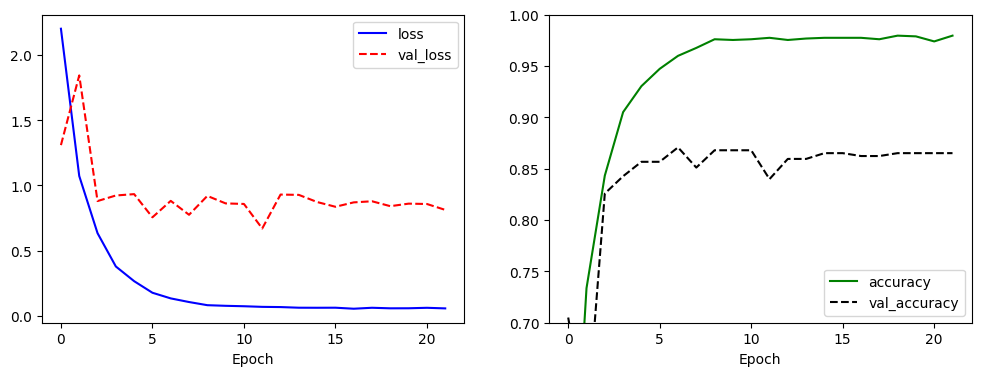

14/14 [==============================] - 0s 4ms/step - loss: 1.3081 - accuracy: 0.8202

 테스트 정확도: 0.8202


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 데이터 전처리
X_data = df['내용'].values
y_data = df['업명'].values

# 라벨 인코딩
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)

# 텍스트 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

# 패딩
X_data = pad_sequences(sequences, padding='post')

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 480, input_length=X_train.shape[1]))  # adjusted output_dim to 480
model.add(LSTM(224))  # adjusted units to 224
model.add(Dense(np.max(y_data)+1, activation='softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])  # adjusted learning rate to 0.01

# 조기 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# 모델 평가
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


In [110]:
df.head(50)

In [14]:
# 예측할 텍스트 데이터
texts_to_predict = ['박건우']  # 예측할 텍스트 데이터를 리스트로 입력해주세요

# 텍스트 데이터를 시퀀스로 변환
sequences_to_predict = tokenizer.texts_to_sequences(texts_to_predict)
padded_sequences_to_predict = pad_sequences(sequences_to_predict, maxlen=max_sequence_length)

# 모델을 사용하여 예측
predictions = model.predict(padded_sequences_to_predict)

# 예측 결과 출력
for i, prediction in enumerate(predictions):
    predicted_label = list(label_mapping.keys())[np.argmax(prediction)]
    print(f"입력 데이터: {texts_to_predict[i]}")
    print(f"예측 결과: {predicted_label}")
    print()


1/1 [==============================] - 0s 14ms/step
입력 데이터: 박건우
예측 결과: 장학금



In [75]:
import pandas as pd

# df.to_excel("data.xlsx", index=False)
# 엑셀 파일 불러오기
df1 = pd.read_excel('./data.xlsx')
df1 = pd.read_excel('./1.xlsx')
df3 = pd.read_excel('./2.xlsx')

In [76]:
combined_df = pd.concat([df1, df1], axis=0)
combined_df_1 = pd.concat([combined_df, df3], axis=0)
combined_df_1

,기업명,브랜드명,업종
0,대영면옥,대영면옥,식비
1,은화수식당경성대점,은화수식당경성대점,식비
2,시외버스 승차권,시외버스 승차권,시외버스
3,스타벅스코리아,스타벅스코리아,카페
4,블루샥 남천점,블루샥 남천점,카페
...,...,...,...
7731,마켓옵틱(주),안경상회,안경
7732,안테나안경,안테나안경,안경
7733,(주)통인익스프레스,통인익스프레스,이사
7734,예스2424(주),예스2424,이사


In [77]:
combined_df_1.reset_index(drop=True, inplace=True)
combined_df_1

,기업명,브랜드명,업종
0,대영면옥,대영면옥,식비
1,은화수식당경성대점,은화수식당경성대점,식비
2,시외버스 승차권,시외버스 승차권,시외버스
3,스타벅스코리아,스타벅스코리아,카페
4,블루샥 남천점,블루샥 남천점,카페
...,...,...,...
12179,마켓옵틱(주),안경상회,안경
12180,안테나안경,안테나안경,안경
12181,(주)통인익스프레스,통인익스프레스,이사
12182,예스2424(주),예스2424,이사


In [125]:
combined_df_1['업종'].unique()

array(['식비', '교통', '카페', '편의점', '의료', '응시비', '문화 및 취미를 포함한 생활비', '기타출금',
       '스터디카페', '쇼핑', '전자결제 및 기타 이체', '문화', '이름', '시스템 소프트웨어 개발 및 공급업',
       '전자부품', '수수료', '서점', '전자지급결제대행업', '정보처리 및 기타컴퓨터운용관련사업',
       '컴퓨터 프로그래밍 서비스업', '프린트', '기타지출', '교육지원비', '보건소', '커피', '기타도소매',
       '종합소매점', '자동차 관련', '교육 (교과)', '교육 (외국어)', '기타 교육', '아이스크림/빙수 ',
       '의류 / 패션', '유아 관련 (교육 외)', '부동산 중개 ', '숙박', '임대', '스포츠 관련', '유아관련',
       '안경', '운송', '이사', '반려동물 관련', '인력 파견', '기타 서비스', '농수산물'],
      dtype=object)

In [126]:
combined_df_1 = pd.read_excel('./com.xlsx')

In [127]:
df = combined_df_1

In [16]:
data = pd.read_excel('./com.xlsx')

Epoch 1/100
244/244 [==============================] - 6s 21ms/step - loss: 3.3200 - accuracy: 0.2132 - val_loss: 2.8313 - val_accuracy: 0.3221
Epoch 2/100
244/244 [==============================] - 5s 19ms/step - loss: 2.5863 - accuracy: 0.3321 - val_loss: 2.5654 - val_accuracy: 0.3656
Epoch 3/100
244/244 [==============================] - 5s 19ms/step - loss: 2.1984 - accuracy: 0.3999 - val_loss: 2.6034 - val_accuracy: 0.3092
Epoch 4/100
244/244 [==============================] - 5s 19ms/step - loss: 1.8557 - accuracy: 0.4744 - val_loss: 2.7493 - val_accuracy: 0.3492
Epoch 5/100
244/244 [==============================] - 5s 19ms/step - loss: 1.6476 - accuracy: 0.5290 - val_loss: 3.1140 - val_accuracy: 0.3472
Epoch 6/100
244/244 [==============================] - 5s 19ms/step - loss: 1.3703 - accuracy: 0.5965 - val_loss: 3.3687 - val_accuracy: 0.3426
Epoch 7/100
244/244 [==============================] - 5s 19ms/step - loss: 1.1444 - accuracy: 0.6511 - val_loss: 3.6799 - val_accuracy:

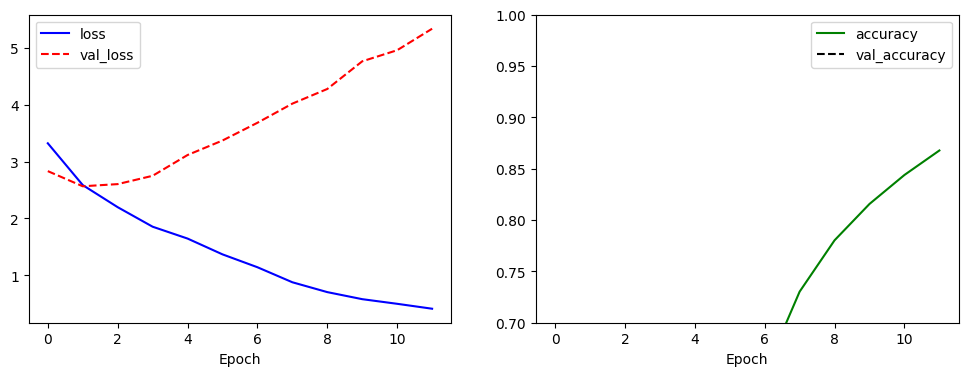

77/77 [==============================] - 0s 3ms/step - loss: 5.2084 - accuracy: 0.3660

 테스트 정확도: 0.3660


In [89]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 데이터 전처리
X_data = df['기업명'] + ' ' + df['브랜드명']  # 기업명과 브랜드명을 하나의 문자열로 합칩니다.
X_data = X_data.values
y_data = df['업종'].values

# 라벨 인코딩
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)

# 텍스트 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

# 패딩
X_data = pad_sequences(sequences, padding='post')

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 128, input_length=X_train.shape[1]))
model.add(LSTM(128))
model.add(Dense(np.max(y_data)+1, activation='softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 조기 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# 모델 평가
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


Epoch 1/100
122/122 [==============================] - 11s 74ms/step - loss: 1.4262 - accuracy: 0.5891 - val_loss: 1.1347 - val_accuracy: 0.6744
Epoch 2/100
122/122 [==============================] - 8s 66ms/step - loss: 0.9669 - accuracy: 0.7144 - val_loss: 1.0185 - val_accuracy: 0.7323
Epoch 3/100
122/122 [==============================] - 8s 66ms/step - loss: 0.5977 - accuracy: 0.7998 - val_loss: 1.2119 - val_accuracy: 0.6513
Epoch 4/100
122/122 [==============================] - 8s 67ms/step - loss: 0.4043 - accuracy: 0.8643 - val_loss: 1.3824 - val_accuracy: 0.5979
Epoch 5/100
122/122 [==============================] - 8s 68ms/step - loss: 0.2584 - accuracy: 0.9170 - val_loss: 2.3546 - val_accuracy: 0.4682
Epoch 6/100
122/122 [==============================] - 8s 68ms/step - loss: 0.1581 - accuracy: 0.9541 - val_loss: 2.0084 - val_accuracy: 0.5949
Epoch 7/100
122/122 [==============================] - 9s 71ms/step - loss: 0.1188 - accuracy: 0.9637 - val_loss: 2.9898 - val_accuracy

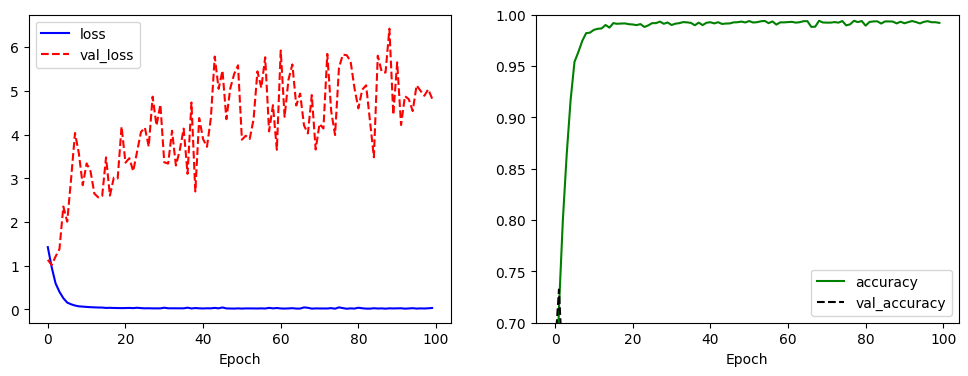

77/77 [==============================] - 1s 17ms/step - loss: 4.5720 - accuracy: 0.5392

 테스트 정확도: 0.5392


In [207]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop

# 데이터 전처리
X_data = df['기업명'] + ' ' + df['브랜드명']  # 기업명과 브랜드명을 하나의 문자열로 합칩니다.
X_data = X_data.values
y_data = df['업종'].values

# 라벨 인코딩
encoder = LabelEncoder()
y_data = encoder.fit_transform(y_data)

# 텍스트 토큰화
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_data)
sequences = tokenizer.texts_to_sequences(X_data)

# 패딩
X_data = pad_sequences(sequences, padding='post')

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# 모델 구성
model = Sequential()
model.add(Embedding(len(tokenizer.word_index)+1, 256, input_length=X_train.shape[1]))  # 임베딩 차원 증가
model.add(LSTM(256, return_sequences=True))  # 레이어 증가 및 return_sequences 추가
model.add(Dropout(0.2))  # Dropout 추가
model.add(LSTM(256))
model.add(Dropout(0.2))  # Dropout 추가
model.add(Dense(np.max(y_data)+1, activation='softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])  # optimizer 변경 및 학습률 조정


# 조기 종료
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# 모델 학습
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping])  # batch_size 변경

# 결과 시각화
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

# 모델 평가
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))


In [194]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

# 데이터 전처리
X_data = df['브랜드명'].values
y_data = df['업종'].values

# 텍스트 벡터화
vectorizer = TfidfVectorizer(min_df=5, max_df = 0.8, sublinear_tf=True, use_idf=True)
X_data = vectorizer.fit_transform(X_data)

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# SVM 모델 생성 및 학습
model = svm.SVC(kernel='linear', probability=True)
model.fit(X_train, y_train)

# 모델 평가
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# 예측
brand_name = ["건강한 재단"]
brand_name_vector = vectorizer.transform(brand_name)
predicted_business = model.predict(brand_name_vector)
print(predicted_business)


              precision    recall  f1-score   support

          교육       1.00      0.03      0.07        86
          교통       0.94      0.84      0.89        88
   금융 및 기타결제       1.00      0.85      0.92       313
          기타       0.71      0.04      0.07       130
          문화       0.92      0.35      0.51       103
          쇼핑       0.94      0.33      0.49       153
          식비       0.68      0.99      0.80      1222
          의료       1.00      0.31      0.48        16
          카페       0.91      0.40      0.55       218
         편의점       0.99      0.85      0.92       108

    accuracy                           0.75      2437
   macro avg       0.91      0.50      0.57      2437
weighted avg       0.80      0.75      0.70      2437

['식비']


In [205]:
brand_name = ["쿠우쿠우경성대점"]
brand_name_vector = vectorizer.transform(brand_name)
predicted_business = model.predict(brand_name_vector)
print(predicted_business)

['식비']


In [208]:
from sklearn.model_selection import GridSearchCV

# 데이터 전처리
X_data = df['브랜드명'].values
y_data = df['업종'].values

# 텍스트 벡터화
vectorizer = TfidfVectorizer(min_df=5, max_df=0.8, sublinear_tf=True, use_idf=True, ngram_range=(1,2))
X_data = vectorizer.fit_transform(X_data)

# 훈련, 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

# SVM 모델 생성 및 학습
model = svm.SVC(probability=True)

# GridSearchCV로 최적 하이퍼파라미터 찾기
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['linear']} 
grid = GridSearchCV(model, param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# 최적 하이퍼파라미터 출력
print(grid.best_params_)

# 모델 평가
predictions = grid.predict(X_test)
print(classification_report(y_test, predictions))

# 예측
brand_name = ["네이버페이"]
brand_name_vector = vectorizer.transform(brand_name)
predicted_business = grid.predict(brand_name_vector)
print(predicted_business)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.693 total time=   1.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.692 total time=   1.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.697 total time=   1.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.696 total time=   0.9s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.691 total time=   1.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.693 total time=   1.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.692 total time=   1.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.697 total time=   1.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.696 total time=   1.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.691 total time=   1.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.693 total time=   1.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

In [210]:
# 예측
brand_name = ["네이버페이결제"]
brand_name_vector = vectorizer.transform(brand_name)
predicted_business = grid.predict(brand_name_vector)
print(predicted_business)


['식비']


In [14]:
def convert_data_to_examples(train, test, DATA_COLUMN, LABEL_COLUMN): 
  train_InputExamples = train.apply(lambda x: InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this case
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)

  validation_InputExamples = test.apply(lambda x: InputExample(guid=None, 
                                                          text_a = x[DATA_COLUMN], 
                                                          text_b = None,
                                                          label = x[LABEL_COLUMN]), axis = 1)
  
  return train_InputExamples, validation_InputExamples

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
  features = [] # -> will hold InputFeatures to be converted later

  for e in examples:
    input_dict = tokenizer.encode_plus(
        e.text_a,
        add_special_tokens=True,
        max_length=max_length, # truncates if len(s) > max_length
        return_token_type_ids=True,
        return_attention_mask=True,
        pad_to_max_length=True, # pads to the right by default # CHECK THIS for pad_to_max_length
        truncation=True
    )

    input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
        input_dict["token_type_ids"], input_dict['attention_mask'])

    features.append(
        InputFeatures(
            input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
        )
    )

  def gen():
    for f in features:
      yield (
          {
              "input_ids": f.input_ids,
              "attention_mask": f.attention_mask,
              "token_type_ids": f.token_type_ids,
          },
          f.label,
      )

  return tf.data.Dataset.from_generator(
      gen,
      ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
      (
          {
              "input_ids": tf.TensorShape([None]),
              "attention_mask": tf.TensorShape([None]),
              "token_type_ids": tf.TensorShape([None]),
          },
          tf.TensorShape([]),
      ),
  )


C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


NameError: name 'label_list' is not defined

In [220]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

model_name = "bert-base-multilingual-cased"
max_length = 128
batch_size = 32
learning_rate = 2e-5
number_of_epochs = 100

# 데이터 전처리
df['text'] = df['기업명'] + " " + df['브랜드명'] # 또는 이 두개 중 하나만 선택하셔도 됩니다.
df['label'] = LabelEncoder().fit_transform(df['업종'])

# 훈련, 테스트 데이터 분리
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# BERT 토크나이저
tokenizer = BertTokenizer.from_pretrained(model_name)

# BERT 모델 로드
model = TFBertForSequenceClassification.from_pretrained(model_name, num_labels=df['label'].nunique())

# 모델 컴파일
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate, epsilon=1e-08), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy('accuracy')])

# EarlyStopping 콜백 설정
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# 모델 학습
history = model.fit(train_dataset, epochs=number_of_epochs, validation_data=val_dataset, callbacks=[early_stopping])

# 결과 시각화
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


ModuleNotFoundError: No module named 'transformers'

In [218]:
# 새로운 데이터로 예측
new_data = ["네이버페이결제"]
new_data_seq = tokenizer.texts_to_sequences(new_data)
new_data_pad = pad_sequences(new_data_seq, padding='post', maxlen=X_train.shape[1])
prediction = saved_model.predict(new_data_pad)
print("Predicted category:", encoder.classes_[np.argmax(prediction)])

1/1 [==============================] - 0s 14ms/step
Predicted category: 카페


In [ ]:
# 먼저 필요한 패키지들을 import합니다.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

# 데이터 전처리
df['text'] = df['기업명'] + " " + df['브랜드명'] # 이 두 개의 칼럼을 결합합니다.
df['label'] = LabelEncoder().fit_transform(df['업종']) # '업종' 칼럼을 라벨로 사용합니다.

# 훈련 데이터와 테스트 데이터를 분리합니다.
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['label'])

# 위에서 정의한 함수들을 이용하여 훈련 데이터와 검증 데이터를 TensorFlow Dataset으로 변환합니다.
train_examples, validation_examples = convert_data_to_examples(train_df, val_df, 'text', 'label')

train_dataset = convert_examples_to_tf_dataset(list(train_examples), tokenizer)
validation_dataset = convert_examples_to_tf_dataset(list(validation_examples), tokenizer)

# Dataset을 배치 크기로 나눕니다.
train_dataset = train_dataset.shuffle(100).batch(batch_size).repeat(2)
validation_dataset = validation_dataset.batch(batch_size)

# 모델 학습
history = model.fit(train_dataset, epochs=number_of_epochs, validation_data=validation_dataset, callbacks=[early_stopping])

# 학습 결과 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()


C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Epoch 1/100
    123/Unknown - 1220s 10s/step - loss: 1.2862 - accuracy: 0.6301

In [17]:
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
label_encoder = LabelEncoder()

# 브랜드명을 BERT 입력으로 변환
inputs = tokenizer(data['브랜드명'].tolist(), padding=True, truncation=True, max_length=128, return_tensors='tf')

# 업종 라벨을 인코딩
labels = label_encoder.fit_transform(data['업종'])


In [18]:
from transformers import TFBertForSequenceClassification

# 분류할 업종의 개수
num_labels = len(label_encoder.classes_)

# 모델 생성
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=num_labels)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [19]:
from tensorflow.keras.callbacks import EarlyStopping

# 하이퍼파라미터 설정
learning_rate = 2e-5
batch_size = 16
epochs = 100

# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])

# 모델 훈련
history = model.fit(inputs, labels, validation_split=0.2, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])


Epoch 1/100


AttributeError: in user code:

    File "C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\keras\engine\training.py", line 1284, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\transformers\modeling_tf_utils.py", line 1490, in compute_loss  *
        return super().compute_loss(*args, **kwargs)
    File "C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\keras\engine\training.py", line 1109, in compute_loss  **
        return self.compiled_loss(
    File "C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\keras\engine\compile_utils.py", line 263, in __call__
        y_t, y_p, sw = match_dtype_and_rank(y_t, y_p, sw)
    File "C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\keras\engine\compile_utils.py", line 840, in match_dtype_and_rank
        if (y_t.dtype.is_floating and y_p.dtype.is_floating) or (

    AttributeError: 'NoneType' object has no attribute 'dtype'


In [30]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, TFBertForSequenceClassification, EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 불러오기
data = pd.read_excel('aaaa.xlsx')

# 토크나이저 설정
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# 텍스트를 토큰화하고, 해당 토큰을 정수로 매핑, attention mask 생성
inputs = tokenizer(data[['기업명', '브랜드명']].values.tolist(), return_tensors='tf', padding='max_length', max_length=256, truncation=True)

# 레이블 인코딩
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['업종'])

# tensorflow의 Dataset을 활용하여 train, test set 분할
dataset = tf.data.Dataset.from_tensor_slices((inputs, labels))

# Dataset shuffle
dataset = dataset.shuffle(buffer_size=len(inputs['input_ids']))

# train / test set 분할 비율
test_size = int(len(inputs['input_ids']) * 0.2)
train_size = len(inputs['input_ids']) - test_size

# train / test set 분할
test_dataset = dataset.take(test_size)
train_dataset = dataset.skip(test_size)

# batch size 적용
batch_size = 16
train_dataset = train_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

# 모델 초기화
num_labels = len(np.unique(labels))
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=num_labels)

# EarlyStopping과 ModelCheckpoint 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True)

# 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[early_stopping, model_checkpoint])

# 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 모델 테스트
test_sentence = 'test sentence'
inputs = tokenizer([test_sentence], return_tensors='tf', padding='max_length', max_length=256, truncation=True)
prediction = model.predict(inputs)[0]
predicted_label = np.argmax(prediction)
predicted_category = label_encoder.inverse_transform([predicted_label])
print(predicted_category)


ImportError: cannot import name 'EarlyStopping' from 'transformers' (C:\Users\Administrator\anaconda3\envs\cap_back\Lib\site-packages\transformers\__init__.py)

In [38]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 데이터 로드
data = pd.read_excel('aaaa.xlsx')

# BERT tokenizer로 토크나이징
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# '기업명'과 '브랜드명'을 합친 새로운 column 생성
data['texts'] = data['기업명'] + ' ' + data['브랜드명']

# '기업명'과 '브랜드명'을 합친 텍스트를 BERT tokenizer를 통해 토크나이징
inputs = tokenizer(data['texts'].to_list(), return_tensors='tf', truncation=True, padding=True, max_length=256)

# '업종' label을 숫자로 변환
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(data['업종'])

# 훈련 데이터와 테스트 데이터 분할
input_ids_train, input_ids_test, labels_train, labels_test = train_test_split(inputs['input_ids'].numpy(), labels, test_size=0.2, random_state=42)
attention_mask_train, attention_mask_test, _, _ = train_test_split(inputs['attention_mask'].numpy(), labels, test_size=0.2, random_state=42)

# tf.data.Dataset으로 변환
train_dataset = tf.data.Dataset.from_tensor_slices(((input_ids_train, attention_mask_train), labels_train)).batch(8)
test_dataset = tf.data.Dataset.from_tensor_slices(((input_ids_test, attention_mask_test), labels_test)).batch(8)

# BERT 모델 로드
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=data['업종'].nunique())

# 옵티마이저, 손실, 측정 지표 설정
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5, epsilon=1e-08)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

# EarlyStopping과 ModelCheckpoint 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
checkpoint_path = "checkpoints/cp.ckpt"
model_checkpoint = ModelCheckpoint(filepath=checkpoint_path,
                                    save_weights_only=True,  # only save model weights
                                    monitor='val_loss',
                                    mode='min',
                                    save_best_only=True)

# 모델 훈련
history = model.fit(train_dataset, epochs=100, validation_data=test_dataset, callbacks=[early_stopping, model_checkpoint])


# 결과 시각화
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 테스트
test_sample = "네이버페이결제"
test_input = tokenizer(test_sample, return_tensors='tf', padding='max_length', max_length=256, truncation=True)

# 입력 데이터를 numpy 배열로 변환
test_input_ids = test_input['input_ids'].numpy()
test_attention_mask = test_input['attention_mask'].numpy()

test_dataset = tf.data.Dataset.from_tensor_slices(({'input_ids': test_input_ids, 'attention_mask': test_attention_mask}))

test_dataset = test_dataset.batch(1)

predictions = model.predict(test_dataset)
predicted_label = np.argmax(predictions.logits, axis=1)[0]

predicted_category = label_encoder.inverse_transform([predicted_label])
print(predicted_category)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/100
   1/1219 [..............................] - ETA: 7:37:50 - loss: 2.3115 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [40]:
data = pd.read_excel('aaaa.xlsx')

In [60]:
data['업종'].unique()

array(['식비', '교통', '카페', '편의점', '의료', '교육', '문화', '기타', '쇼핑', '금융 및 기타결제'],
      dtype=object)

In [59]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import pickle

tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# 학습 단계에서 사용한 LabelEncoder 로드
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

YOUR_NUMBER_OF_CLASSES = len(np.unique(label_encoder.classes_))  # 클래스의 수는 LabelEncoder의 유니크 클래스 수로 정의합니다.

# 모델 구조 정의
model = TFBertForSequenceClassification.from_pretrained('bert-base-multilingual-cased', num_labels=YOUR_NUMBER_OF_CLASSES)

# 가중치 로드
model.load_weights('checkpoints/cp.ckpt')

def predict(text):
    # 입력 데이터 전처리
    encoding = tokenizer(text, return_tensors='tf', padding=True, truncation=True, max_length=256)
    input_ids = encoding['input_ids']
    attention_mask = encoding['attention_mask']

    # 데이터셋 구성
    test_dataset = tf.data.Dataset.from_tensor_slices(((input_ids, attention_mask))).batch(1)

    # 예측
    predictions = model.predict(test_dataset)
    predicted_label = np.argmax(predictions.logits, axis=1)[0]

    # 예측 결과를 원래의 카테고리로 변환
    predicted_category = label_encoder.inverse_transform([predicted_label])
    return predicted_category

# 테스트 데이터에 대한 예측
text = "스타벅스"
print(predict(text))


FileNotFoundError: [Errno 2] No such file or directory: 'label_encoder.pkl'

In [58]:
data

,기업명,브랜드명,업종
0,대영면옥,대영면옥,식비
1,은화수식당경성대점,은화수식당경성대점,식비
2,시외버스 승차권,시외버스 승차권,교통
3,스타벅스코리아,스타벅스코리아,카페
4,블루샥 남천점,블루샥 남천점,카페
...,...,...,...
12179,마켓옵틱(주),안경상회,쇼핑
12180,안테나안경,안테나안경,쇼핑
12181,(주)통인익스프레스,통인익스프레스,교통
12182,예스2424(주),예스2424,교통
